# **1).Customer IT Support -Ticket Dataset**

In [1]:
# Install necessary libraries
!pip install pandas nltk matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords



In [27]:
df = pd.read_csv("/content/helpdesk_customer_tickets.csv")
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN


In [28]:
df.shape

(600, 18)

In [4]:
df.columns

Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   subject        599 non-null    object 
 2   body           600 non-null    object 
 3   answer         600 non-null    object 
 4   type           600 non-null    object 
 5   queue          600 non-null    object 
 6   priority       600 non-null    object 
 7   language       600 non-null    object 
 8   business_type  600 non-null    object 
 9   tag_1          600 non-null    object 
 10  tag_2          600 non-null    object 
 11  tag_3          600 non-null    object 
 12  tag_4          600 non-null    object 
 13  tag_5          432 non-null    object 
 14  tag_6          173 non-null    object 
 15  tag_7          56 non-null     object 
 16  tag_8          9 non-null      object 
 17  tag_9          0 non-null      float64
dtypes: float64

In [30]:
df.isnull().sum()

,0
id,0
subject,1
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [31]:
df.dropna(subset=['subject'], inplace=True)


In [32]:
df.isnull().sum()

,0
id,0
subject,0
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [33]:
df.dropna(subset=['tag_9'], inplace=True)

In [34]:
df.isnull().sum()

,0
id,0
subject,0
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [42]:
df["language"].unique()

array(['de', 'fr', 'es', 'pt', 'en'], dtype=object)

In [44]:
df["business_type"].unique()

array(['Tech Online Store', 'Software Development Company',
       'IT Consulting Firm', 'IT Services'], dtype=object)

In [45]:
# prompt: analyse business_type distribution

# Analyze the distribution of business types
business_type_counts = df['business_type'].value_counts()
print(business_type_counts)



business_type
Tech Online Store               288
IT Services                     196
Software Development Company     76
IT Consulting Firm               40
Name: count, dtype: int64


In [46]:
df['priority'].describe()

,priority
count,600
unique,3
top,high
freq,266


In [47]:
df["priority"].unique()

array(['medium', 'high', 'low'], dtype=object)

In [48]:
df['type'].describe()

,type
count,600
unique,4
top,Incident
freq,253


In [49]:
df["type"].unique()

array(['Request', 'Incident', 'Problem', 'Change'], dtype=object)

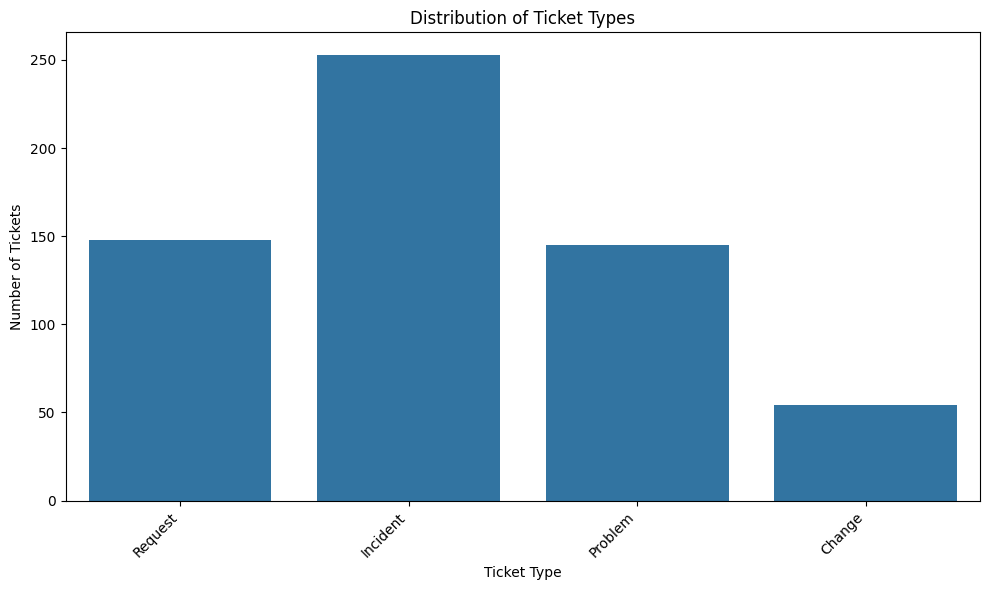

In [50]:
# prompt: create a bar chart  to easily communicate the distribution of ticket types and quickly identify where the most attention is needed.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'type' column contains ticket types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [51]:
df["queue"].unique()

array(['Customer Service', 'Product Support', 'Returns and Exchanges',
       'Human Resources', 'Billing and Payments', 'Technical Support',
       'IT Support', 'Sales and Pre-Sales', 'General Inquiry',
       'Service Outages and Maintenance'], dtype=object)

In [52]:
df.loc[df["priority"].eq("high"), :]

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
7,900,Frequent Disconnections and Crashes,Customer reports frequent disconnections and c...,We'll investigate the issue with Zoom 5.11.0. ...,Incident,Product Support,high,en,Software Development Company,Technical Support,Service Disruption,Network Issue,Software Bug,Problem Resolution,Urgent Issue,NaN,NaN,NaN
9,1032,Urgent: Immediate Assistance Required for Serv...,"Dear IT Services Customer Support, \n\nOur ser...","Dear <name>,\n\nThank you for contacting IT Se...",Problem,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,Service Disruption,System Crash,Problem Resolution,Incident Report,NaN,NaN
10,1033,Problema com a Tela Sensível ao Toque do Surfa...,"Caro suporte ao cliente, estou enfrentando pro...","Caro <name>, Lamentamos saber sobre o problema...",Incident,Product Support,high,pt,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,NaN,NaN,NaN,NaN,NaN
14,1586,Dringend: Hardwarefehler beim Dell XPS 13 9310,"Sehr geehrte IT-Services, unser Dell XPS 13 93...","Sehr geehrte <name>,\n\nBitte aktualisieren Si...",Incident,IT Support,high,de,IT Services,Hardware Failure,Technical Support,System Maintenance,Problem Resolution,Urgent Issue,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,97661,Problema de Error de Suscripción,No se puede acceder al correo electrónico y Ex...,"Estimado/a <name>, estamos investigando los pr...",Problem,Technical Support,high,es,Software Development Company,Technical Support,Software Bug,Problem Resolution,Urgent Issue,Account Assistance,NaN,NaN,NaN,NaN
594,99337,Échange demandé pour un ordinateur portable dé...,"Cher support client,\n\nJ'espère que ce messag...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Returns and Exchanges,high,fr,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Problem Resolution,Technical Support,NaN,NaN,NaN,NaN
595,99421,Urgente: Problema de Conectividad del Router,"Estimado Soporte de Servicios de TI,\n\nEstamo...","Estimado <name>,\n\nGracias por ponerte en con...",Problem,IT Support,high,es,IT Services,Technical Support,Urgent Issue,Network Issue,Problem Resolution,Service Disruption,IT Support,NaN,NaN,NaN
597,99541,Necesito soporte urgente,"Estimado soporte al cliente, La pantalla tácti...","Estimado <name>,\n\nGracias por ponerte en con...",Problem,Technical Support,high,es,Tech Online Store,Technical Support,Urgent Issue,Hardware Failure,Problem Resolution,Product Support,System Maintenance,NaN,NaN,NaN


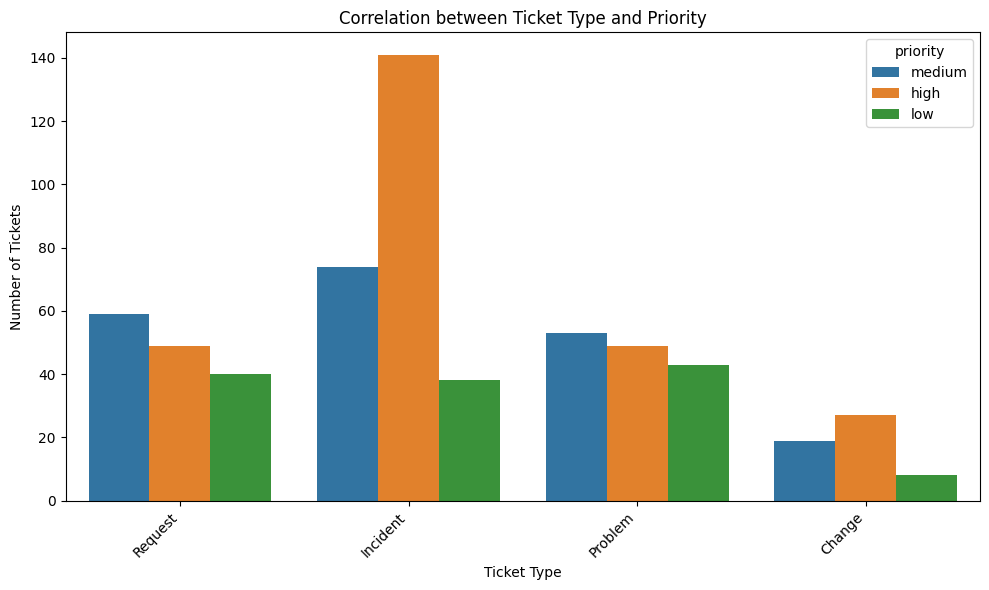

In [53]:
# prompt: colrelate high priority and incident type

# Assuming 'type' column contains ticket types and 'priority' column contains ticket priority
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='priority', data=df)
plt.title('Correlation between Ticket Type and Priority')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [57]:
df = pd.read_csv("/content/helpdesk_customer_tickets.csv")
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN
